In [223]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as p

In [224]:
data = pd.read_csv('../data/harare-metropolian-updated.csv')
data.shape

(539, 21)

In [225]:
data.head()

,suburb,density,property,price,rooms,bedroom,toilets,ensuite,condition,constituency,...,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
0,GREYSTONE PARK,LOW,FLAT,3000,15,7,8,7,4,HARARE EAST,...,2,0,1,0,1,1,1,1,0,1
1,CHISIPITE,LOW,HOUSE,2500,13,7,6,2,4,MOUNT PLEASANT,...,4,1,1,3,1,0,1,1,0,1
2,AVONDALE,LOW,HOUSE,3500,12,5,5,1,4,MOUNT PLEASANT,...,2,1,1,3,1,1,1,1,0,1
3,ARCADIA,MEDIUM,HOUSE,750,8,4,3,2,4,SUNNINGDALE,...,2,0,1,2,1,0,1,0,0,1
4,HATFIELD,MEDIUM,HOUSE,700,8,4,4,3,4,HATFIELD,...,2,0,1,0,1,1,1,1,1,1


- Let's check the last five rows from data

In [226]:
data.tail()

,suburb,density,property,price,rooms,bedroom,toilets,ensuite,condition,constituency,...,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
534,MOUNT PLEASANT,LOW,CLUSTER,130,1,0,1,0,4,MOUNT PLEASANT,...,0,0,1,0,1,0,1,1,0,0
535,VAINONA,LOW,CLUSTER,120,1,0,1,1,3,HARARE EAST,...,0,0,0,0,1,0,1,0,0,0
536,TYNWALD,MEDIUM,CLUSTER,150,1,0,1,1,4,HARARE WEST,...,0,0,0,0,1,0,1,1,0,0
537,WATERFALLS,MEDIUM,CLUSTER,70,1,0,1,0,3,HATFIELD,...,0,0,0,0,1,0,1,0,0,0
538,WESTLEA,MEDIUM,CLUSTER,100,1,0,1,1,4,WARREN PARK,...,0,0,0,0,1,0,1,1,0,0


- Let's check the random ten number of data samples, Every time it will print the random five sample of records from original datasets. So we can easly understand the behaviour and what types of data type stored in particular features.

In [227]:
data.sample(10)

,suburb,density,property,price,rooms,bedroom,toilets,ensuite,condition,constituency,...,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
275,AVENUES,LOW,HOUSE,1400,5,2,1,0,4,HARARE CENTRAL,...,2,0,1,2,1,0,1,1,0,1
396,DRYCOAT FARM,COMPOUND,CLUSTER,50,2,0,1,0,1,HUNYANI,...,0,0,0,0,0,0,0,1,0,0
307,UNIT A,HIGH,CLUSTER,100,2,0,1,0,3,ZENGEZA EAST,...,0,0,0,0,1,0,1,0,0,0
367,DZIVARASEKWA,HIGH,CLUSTER,60,1,0,1,0,3,DZIVARASEKWA,...,0,0,1,0,1,0,1,0,0,0
23,MOUNT PLEASANT,LOW,HOUSE,2500,9,4,2,1,5,MOUNT PLEASANT,...,0,1,1,4,1,0,1,1,0,1
21,HATFIELD,MEDIUM,HOUSE,650,6,3,2,1,4,HATFIELD,...,2,0,0,0,1,1,1,1,0,1
318,KUWADZANA 8,HIGH,CLUSTER,100,2,0,1,0,3,KUWADZANA WEST,...,0,0,1,0,1,0,1,0,0,0
351,ARLINGTON,LOW,COTTAGE,600,5,3,2,1,4,HUNYANI,...,0,0,0,0,1,1,1,1,0,1
90,BORROWDALE,LOW,HOUSE,1800,7,4,4,2,4,HARARE EAST,...,2,1,1,0,1,0,1,1,0,1
4,HATFIELD,MEDIUM,HOUSE,700,8,4,4,3,4,HATFIELD,...,2,0,1,0,1,1,1,1,1,1


### Target Feature

In [228]:

TARGET_FEATURE = 'price'

Y = data[TARGET_FEATURE]

Y.head()

0    3000
1    2500
2    3500
3     750
4     700
Name: price, dtype: int64

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   suburb        539 non-null    object
 1   density       539 non-null    object
 2   property      539 non-null    object
 3   price         539 non-null    int64 
 4   rooms         539 non-null    int64 
 5   bedroom       539 non-null    int64 
 6   toilets       539 non-null    int64 
 7   ensuite       539 non-null    int64 
 8   condition     539 non-null    int64 
 9   constituency  539 non-null    object
 10  council       539 non-null    object
 11  carport       539 non-null    int64 
 12  pool          539 non-null    int64 
 13  furnished     539 non-null    int64 
 14  cottage       539 non-null    int64 
 15  power         539 non-null    int64 
 16  pbackup       539 non-null    int64 
 17  water         539 non-null    int64 
 18  wbackup       539 non-null    int64 
 19  gated   

As we can see in the output.

1. There are **13580 entries**
1. There are total **21 features (0 to 20)**
1. There are three types of datatype dtypes: **float64(12), int64(1), object(8)**
1. It's Memory usage that is, memory usage: **2.2+ MB**
1. Also, We can check how many missing values available in the **Non-Null Count** column

In [230]:
data.describe()

,price,rooms,bedroom,toilets,ensuite,condition,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,683.447124,4.051948,1.593692,1.523191,0.565863,3.354360,0.461967,0.118738,0.499072,0.298701,0.892393,0.252319,0.881262,0.493506,0.063080,0.454545
std,854.520202,2.460296,1.711550,0.902763,0.831995,0.991898,0.801915,0.323781,0.500464,0.796028,0.310171,0.434747,0.323781,0.500422,0.243332,0.498392
min,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,325.000000,3.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,800.000000,6.000000,3.000000,2.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3500.000000,15.000000,7.000000,8.000000,7.000000,5.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here,`describe()` method provides us the complete calculations details about the dataset. i.e. let's take the `price` feature for example. It shows the what's the `min`, `max`, `mean(average)` and `std(standard deviation)` of price feature.

In [231]:
data.price.describe([.2, .4, .6, .8])

count     539.000000
mean      683.447124
std       854.520202
min        25.000000
20%        90.000000
40%       183.000000
50%       325.000000
60%       450.000000
80%      1200.000000
max      3500.000000
Name: price, dtype: float64

### Categorical Features

In [232]:
numeric_features = data.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)

(Index(['price', 'rooms', 'bedroom', 'toilets', 'ensuite', 'condition',
        'carport', 'pool', 'furnished', 'cottage', 'power', 'pbackup', 'water',
        'wbackup', 'gated', 'garden'],
       dtype='object'),
 16)

### Numerical Features

In [233]:
categorical_features = data.select_dtypes('object').columns

categorical_features, len(categorical_features)

(Index(['suburb', 'density', 'property', 'constituency', 'council'], dtype='object'),
 5)

In [234]:
print("Number of `Numerical` Features are:", len(numeric_features) )
print("Number of `Categorical` Features are:", len(categorical_features) )

Number of `Numerical` Features are: 16
Number of `Categorical` Features are: 5


### Find the Missing Values

Here, We need to find how many missing values are there in our datasets.

In [235]:
data.isna().sum().sort_values(ascending=False)

suburb          0
carport         0
gated           0
wbackup         0
water           0
pbackup         0
power           0
cottage         0
furnished       0
pool            0
council         0
density         0
constituency    0
condition       0
ensuite         0
toilets         0
bedroom         0
rooms           0
price           0
property        0
garden          0
dtype: int64

Here, We convert the number of missing values into percentages. So, we can easly understand to how many percentage of missing values available.

In [236]:
(data.isna().sum() * 100 / data.isna().count()).sort_values(ascending=False)

suburb          0.0
carport         0.0
gated           0.0
wbackup         0.0
water           0.0
pbackup         0.0
power           0.0
cottage         0.0
furnished       0.0
pool            0.0
council         0.0
density         0.0
constituency    0.0
condition       0.0
ensuite         0.0
toilets         0.0
bedroom         0.0
rooms           0.0
price           0.0
property        0.0
garden          0.0
dtype: float64

In [237]:
# Now, is there any missing values are there?
data.isna().any()

suburb          False
density         False
property        False
price           False
rooms           False
bedroom         False
toilets         False
ensuite         False
condition       False
constituency    False
council         False
carport         False
pool            False
furnished       False
cottage         False
power           False
pbackup         False
water           False
wbackup         False
gated           False
garden          False
dtype: bool

#### Categorical Features

In [238]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 539
Total Unique Records of suburb = 177
Total Unique Records of density = 4
Total Unique Records of property = 4
Total Unique Records of constituency = 30
Total Unique Records of council = 3


###### Removing columns which has huge number of unique values

# 3. Data Visualizations


In [239]:
data.sample(4)


,suburb,density,property,price,rooms,bedroom,toilets,ensuite,condition,constituency,...,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
295,MALBEREIGN,LOW,COTTAGE,700,5,3,1,1,4,HARARE WEST,...,0,0,1,0,1,0,1,0,0,1
349,MOUNT PLEASANT,LOW,HOUSE,650,5,3,1,0,4,MOUNT PLEASANT,...,0,0,1,0,1,1,1,1,0,1
294,WESTVIEW,COMPOUND,CLUSTER,45,1,1,1,0,2,EPWORTH SOUTH,...,0,0,0,0,1,0,1,1,0,0
325,ROCKDALE,COMPOUND,CLUSTER,50,2,0,1,0,2,EPWORTH NORTH,...,0,0,0,0,1,0,0,0,0,0


In [240]:
corr_ = data[numeric_features].corr()
corr_

,price,rooms,bedroom,toilets,ensuite,condition,carport,pool,furnished,cottage,power,pbackup,water,wbackup,gated,garden
price,1.000000,0.823127,0.808732,0.755834,0.674464,0.657340,0.594445,0.604487,0.536219,0.535784,0.244397,0.438072,0.250252,0.326593,0.218676,0.592862
rooms,0.823127,1.000000,0.921386,0.766027,0.685719,0.585779,0.571922,0.477578,0.507260,0.467551,0.275269,0.385673,0.280759,0.293158,0.149755,0.556734
bedroom,0.808732,0.921386,1.000000,0.792250,0.716506,0.608313,0.544641,0.449463,0.527949,0.427583,0.288625,0.412814,0.305211,0.338714,0.177693,0.600413
toilets,0.755834,0.766027,0.792250,1.000000,0.879576,0.460965,0.497396,0.416618,0.416597,0.408065,0.188157,0.382883,0.187492,0.303771,0.213326,0.466071
ensuite,0.674464,0.685719,0.716506,0.879576,1.000000,0.499835,0.446026,0.336613,0.400791,0.336491,0.214785,0.411322,0.215383,0.314651,0.227332,0.490229
condition,0.657340,0.585779,0.608313,0.460965,0.499835,1.000000,0.445779,0.360690,0.515514,0.331804,0.541040,0.352619,0.576904,0.261155,0.199856,0.639872
carport,0.594445,0.571922,0.544641,0.497396,0.446026,0.445779,1.000000,0.497063,0.471162,0.502644,0.192756,0.411449,0.211655,0.315506,0.288559,0.459574
pool,0.604487,0.477578,0.449463,0.416618,0.336613,0.360690,0.497063,1.000000,0.333334,0.460707,0.127463,0.341363,0.134737,0.176844,0.046309,0.390581
furnished,0.536219,0.507260,0.527949,0.416597,0.400791,0.515514,0.471162,0.333334,1.000000,0.320297,0.262787,0.334254,0.354914,0.209641,0.198903,0.534513
cottage,0.535784,0.467551,0.427583,0.408065,0.336491,0.331804,0.502644,0.460707,0.320297,1.000000,0.107838,0.232975,0.137865,0.165858,0.046484,0.322420


Text(0.5, 1.0, 'condition')

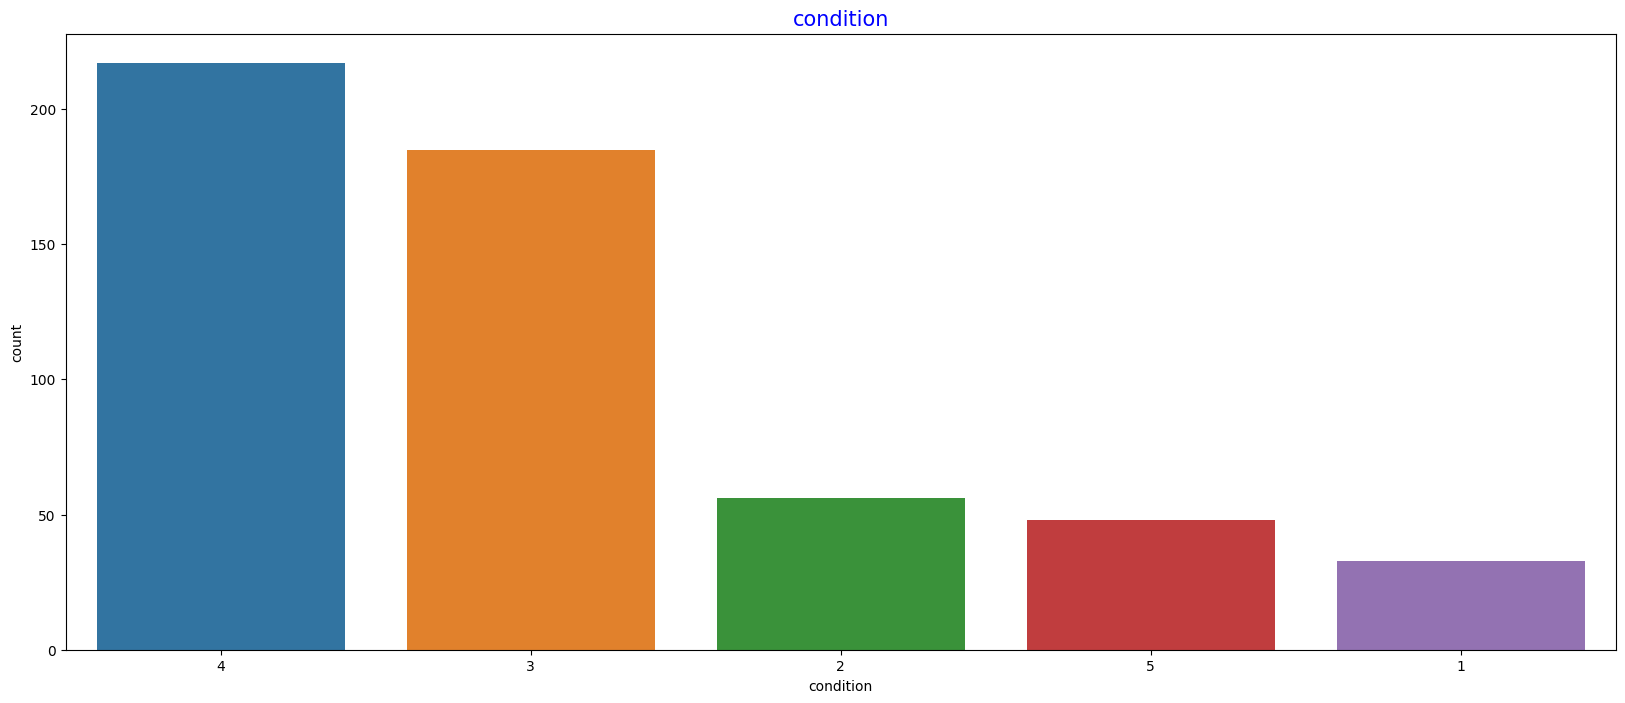

In [241]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='condition', order=data['condition'].value_counts().index)
plt.title("condition", color='blue', fontsize=15)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bedroom'}>,
        <Axes: title={'center': 'toilets'}>],
       [<Axes: title={'center': 'ensuite'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'carport'}>,
        <Axes: title={'center': 'pool'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'cottage'}>,
        <Axes: title={'center': 'power'}>,
        <Axes: title={'center': 'pbackup'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'wbackup'}>,
        <Axes: title={'center': 'gated'}>,
        <Axes: title={'center': 'garden'}>]], dtype=object)

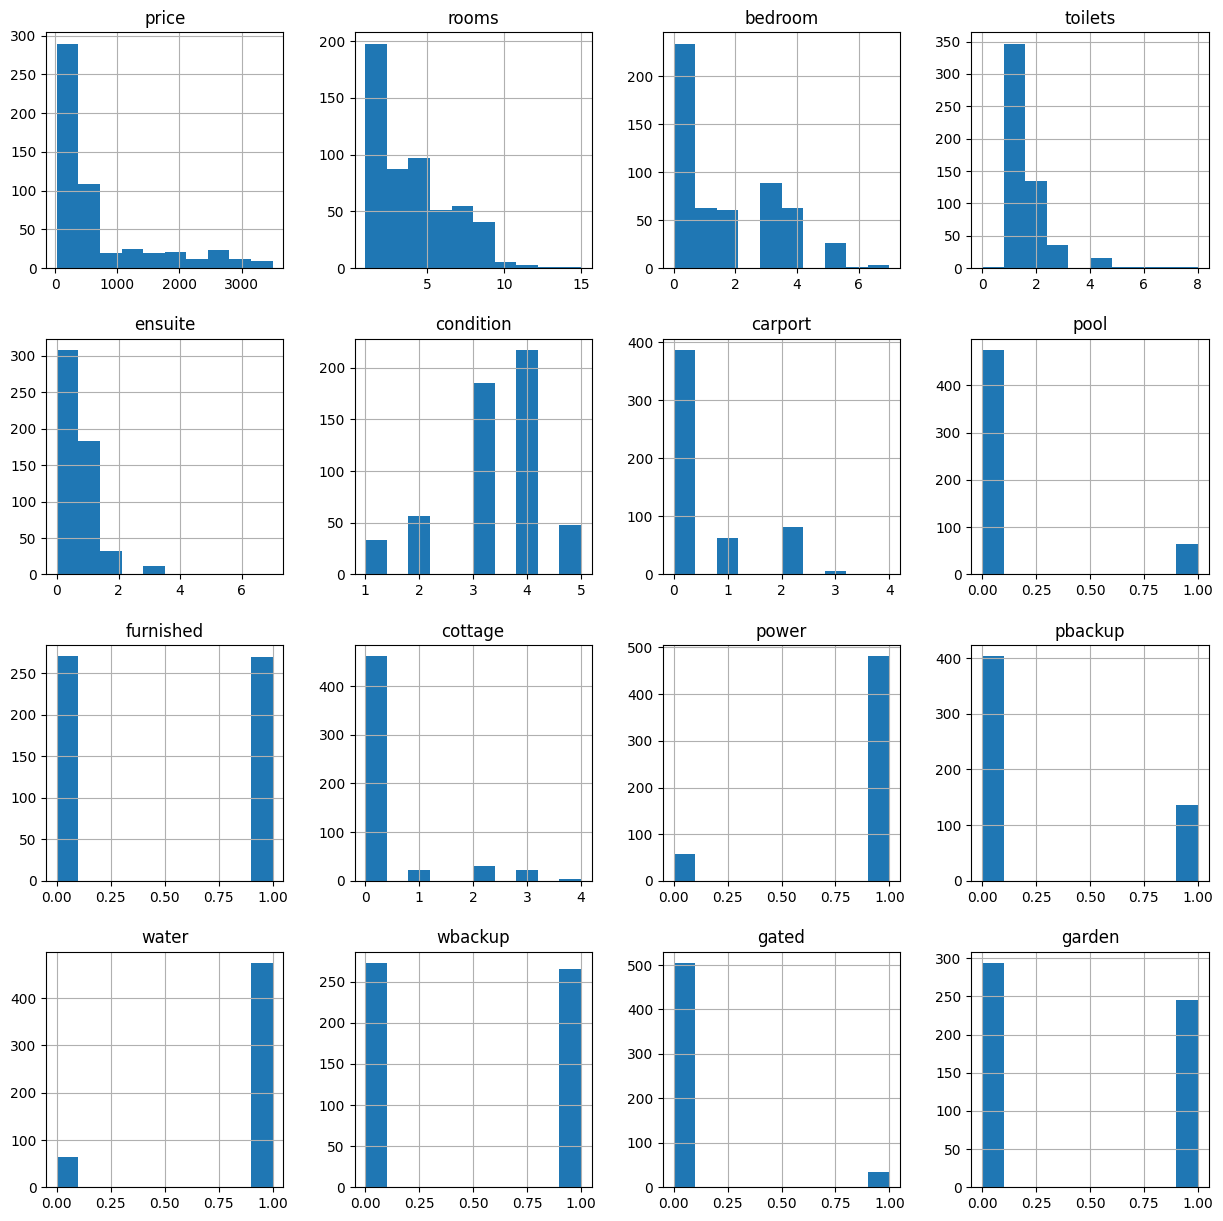

In [242]:
data.hist(figsize=(15,15))

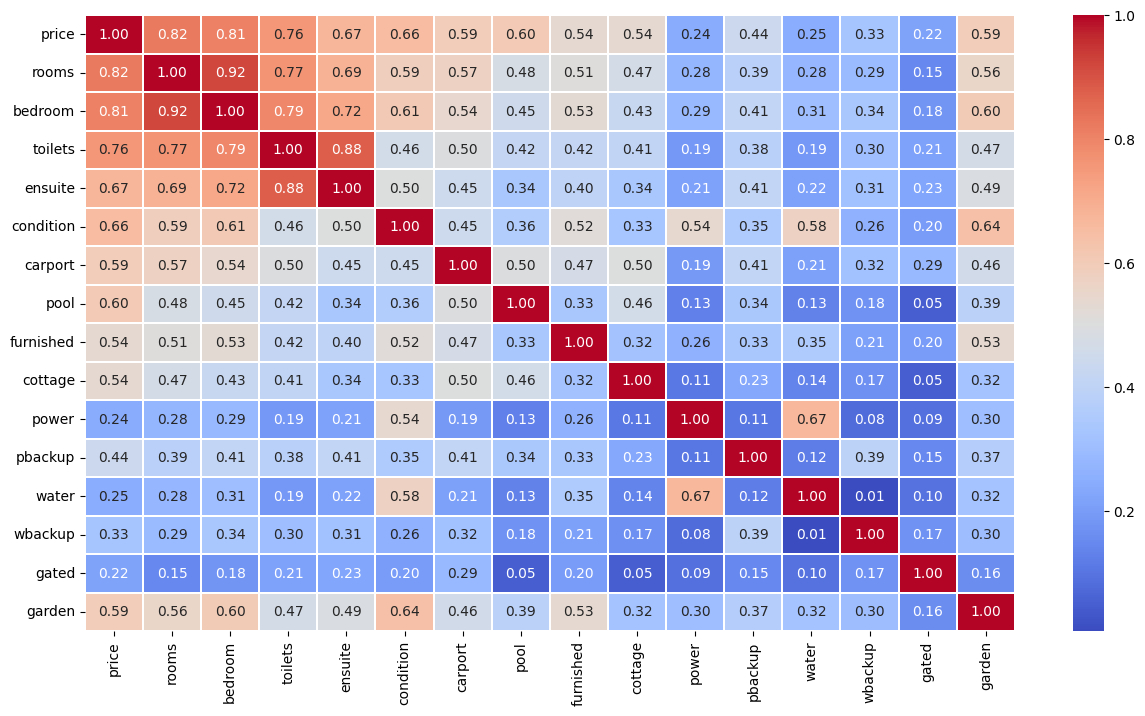

In [243]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

## Feature Selection


- Here, We need to convert categorical values to numerical values

In [244]:
data[categorical_features].value_counts()

suburb             density  property  constituency    council            
MOUNT PLEASANT     LOW      HOUSE     MOUNT PLEASANT  HARARE MUNICIPALITY    13
BORROWDALE         LOW      HOUSE     HARARE EAST     HARARE MUNICIPALITY     8
HIGHLANDS          LOW      HOUSE     MOUNT PLEASANT  HARARE MUNICIPALITY     7
GREENDALE          LOW      HOUSE     SUNNINGDALE     HARARE MUNICIPALITY     6
BORROWDALE BROOKE  LOW      HOUSE     HARARE EAST     HARARE MUNICIPALITY     6
                                                                             ..
KAMBUZUMA          HIGH     COTTAGE   HARARE CENTRAL  HARARE MUNICIPALITY     1
                            HOUSE     HARARE CENTRAL  HARARE MUNICIPALITY     1
KUWADZANA 1        HIGH     CLUSTER   KUWADZANA EAST  HARARE MUNICIPALITY     1
                            HOUSE     KUWADZANA EAST  HARARE MUNICIPALITY     1
KUWADZANA 5        HIGH     HOUSE     KUWADZANA WEST  HARARE MUNICIPALITY     1
Name: count, Length: 321, dtype: int64

- Implementing `LabelEncoder` to convert categorical values to numerical values.

In [245]:
# Encoding ...
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

In [246]:
correlation_mat = data.corr()

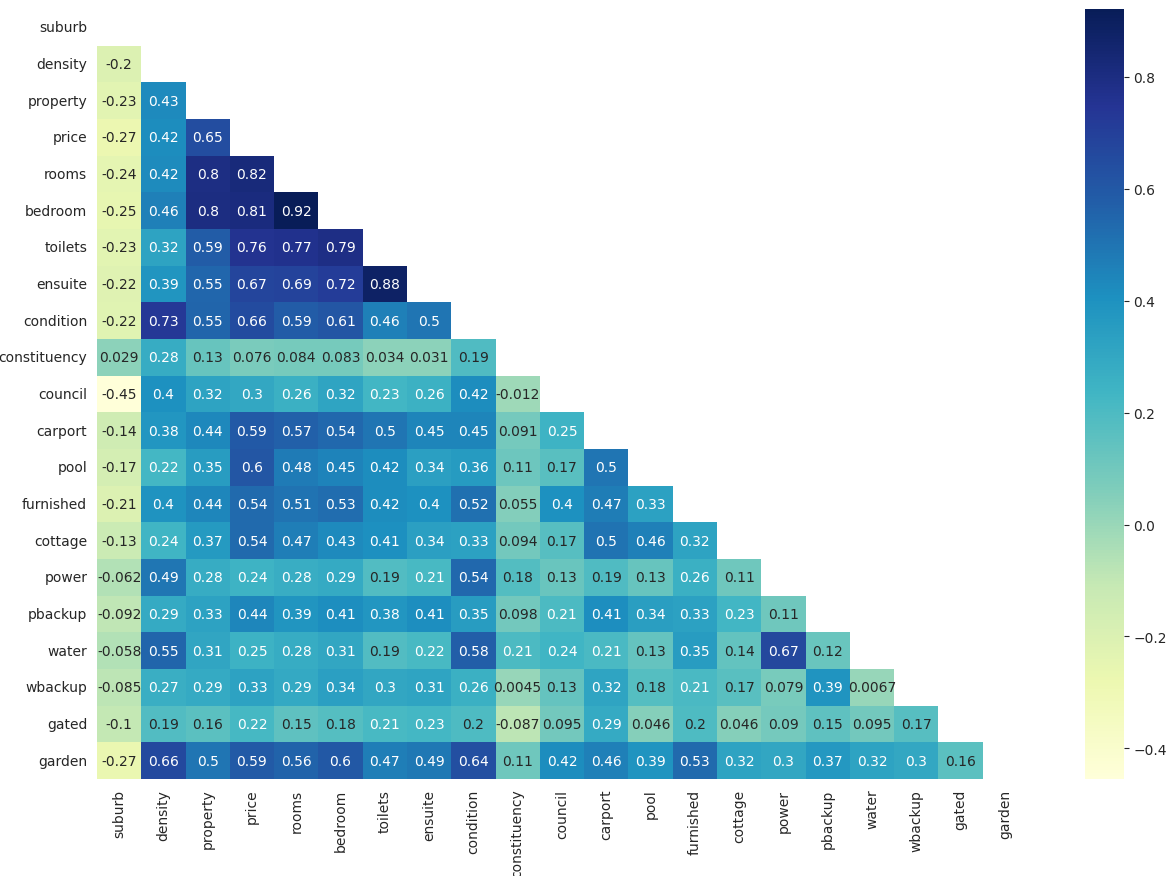

In [247]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7,6))
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

- Creating Training Feature to train the model to predict the beter accuracy.

In [248]:

# training_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                         'YearBuilt', 'Lattitude', 'Longtitude']

training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('price')

# show the final list
training_features

['rooms',
 'bedroom',
 'toilets',
 'ensuite',
 'condition',
 'carport',
 'pool',
 'furnished',
 'cottage',
 'power',
 'pbackup',
 'water',
 'wbackup',
 'gated',
 'garden',
 'suburb',
 'density',
 'property',
 'constituency',
 'council']

In [249]:
for col in training_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Unique Records of rooms = 14
Total Unique Records of bedroom = 8
Total Unique Records of toilets = 9
Total Unique Records of ensuite = 8
Total Unique Records of condition = 5
Total Unique Records of carport = 5
Total Unique Records of pool = 2
Total Unique Records of furnished = 2
Total Unique Records of cottage = 5
Total Unique Records of power = 2
Total Unique Records of pbackup = 2
Total Unique Records of water = 2
Total Unique Records of wbackup = 2
Total Unique Records of gated = 2
Total Unique Records of garden = 2
Total Unique Records of suburb = 177
Total Unique Records of density = 4
Total Unique Records of property = 4
Total Unique Records of constituency = 30
Total Unique Records of council = 3


### Scalling Dataset

- Here, We are using `MinMaxScaler` to notmalize our dataset. Firstly, we need to import that class from `sklearn.preprocessing` package

In [250]:
from sklearn.preprocessing import MinMaxScaler
minMaxNorm = MinMaxScaler()
minMaxNorm.fit(data[training_features])

MinMaxScaler()

Create `X` data and assignning from `training feature` columns from `data` and make it normalized.

In [251]:
scaled = minMaxNorm.transform(data[training_features])

In [252]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create PCA object
pca = PCA()

# Fit PCA to the scaled features
pca.fit(scaled)


# Transform the data using the fitted PCA model
X = pca.transform(data[training_features])
X

c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


array([[  1.47286329,   2.97668128, -12.10897392, ...,   1.19822185,
          9.63514778,   1.25993318],
       [  5.22196932,   0.04370691,  -8.90712229, ...,  -2.428561  ,
          7.38821495,   2.39341751],
       [  6.90947828,  -1.04846469,  -5.27064242, ...,  -2.50715825,
          7.43826094,   2.31008304],
       ...,
       [-13.46810433,   7.27573961, -27.32888002, ...,   1.09591407,
          2.60789983,   1.13055747],
       [-15.97194646,   7.58167069, -30.30557287, ...,   0.44483721,
          2.8645872 ,   1.82173513],
       [-15.32868727,   7.82073666, -33.41307439, ...,   1.09819447,
          2.98814018,   1.20902838]])

In [253]:
Y = data['price']  
Y

0      3000
1      2500
2      3500
3       750
4       700
       ... 
534     130
535     120
536     150
537      70
538     100
Name: price, Length: 539, dtype: int64

## Splite Train and Test Dataset

Before we splite the data, We need to import train_test_split module from sklearn package

In [254]:
from sklearn.model_selection import train_test_split

### Splites the main data

- split data into training and validation data, for both features and target. The split is based on a random number generator.
- Supplying a numeric value to the random_state argument guarantees we get the same split eve run this script.

In [255]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2,random_state=101)

##### Check the train and test sized

In [256]:
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  539
Train size:  (431, 20) (431,)
Test size:  (108, 20) (108,)


# Model Building

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [258]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_Y)
lr_model_predicted = lr_model.predict(test_X)

In [259]:
print('model_name', lr_model.__class__.__name__)

lr_model_score = lr_model.score(test_X, test_Y )
print('prediction_score', lr_model_score)

mae = mean_absolute_error(test_Y, lr_model_predicted)
print('Mean Absolute Error', mae)

mse = mean_squared_error(test_Y, lr_model_predicted)
print("Mean Squared Error:", mse)

model_name LinearRegression
prediction_score 0.8033932564938023
Mean Absolute Error 273.2920838741752
Mean Squared Error: 138719.58268516816


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\327889387.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

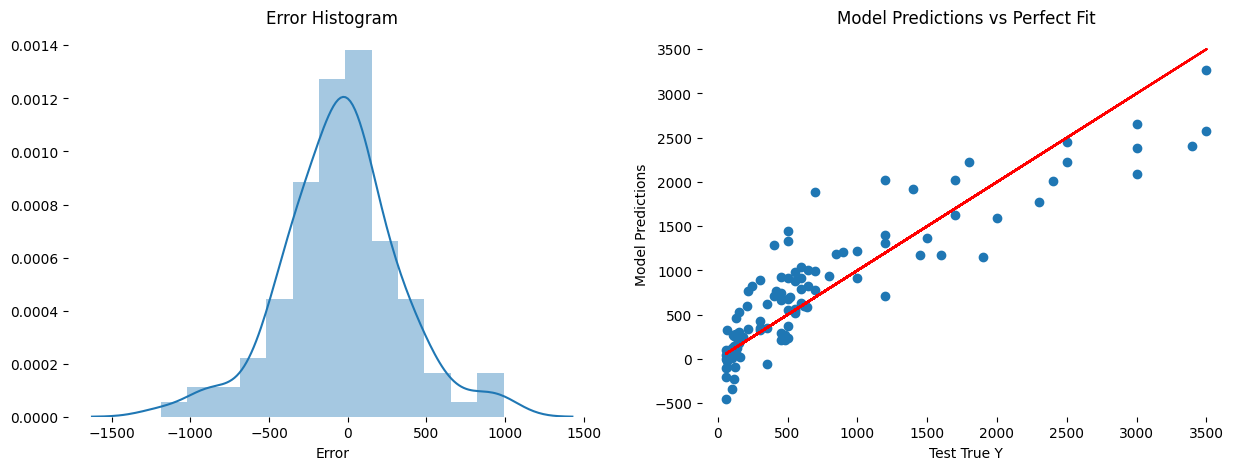

In [260]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,lr_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - lr_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [261]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', lr_model.predict(single_house))

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: [990.07517348]

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


###### Store model and it's predictoin score in dataframe that we created below the model building section

### Decision Tree Regressor Model

In [262]:
Dtree_model = DecisionTreeRegressor(random_state=1)
Dtree_model.fit(train_X, train_Y)
Dtree_model_predicted = Dtree_model.predict(test_X)

In [263]:
print('model_name', Dtree_model.__class__.__name__)

Dtree_model_score = Dtree_model.score(test_X, test_Y)
print('prediction_score', Dtree_model_score)

mae = mean_absolute_error(Dtree_model_predicted, test_Y)
print('Mean Absolute Error', mae)

mse = mean_squared_error(lr_model_predicted, test_Y)
print("Mean Squared Error:", mse)

model_name DecisionTreeRegressor
prediction_score -0.0347984989685719
Mean Absolute Error 499.02777777777777
Mean Squared Error: 138719.58268516816


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\971383405.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

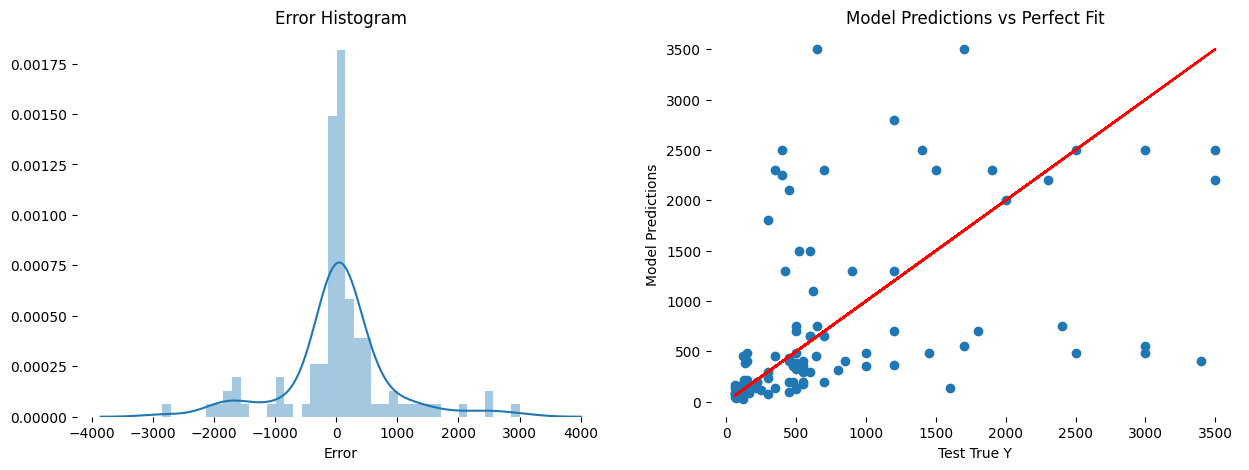

In [264]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,Dtree_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - Dtree_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [265]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', Dtree_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 400.0

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Random Forest Regressor Model

In [266]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)
RFRModel.fit(train_X, train_Y)
RFRModel_predicted = RFRModel.predict(test_X)

In [267]:
print('model_name', RFRModel.__class__.__name__)

RFRModel_score = RFRModel.score(test_X, test_Y)
print('prediction_score', RFRModel_score)

mae = mean_absolute_error(RFRModel_predicted, test_Y)
print('mean_absolute_error', mae)

mse = mean_squared_error(RFRModel_predicted, test_Y)
print("Mean Squared Error:", mse)

model_name RandomForestRegressor
prediction_score 0.5750054210452442
mean_absolute_error 319.51023517167994
Mean Squared Error: 299862.91204810096


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\659093756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

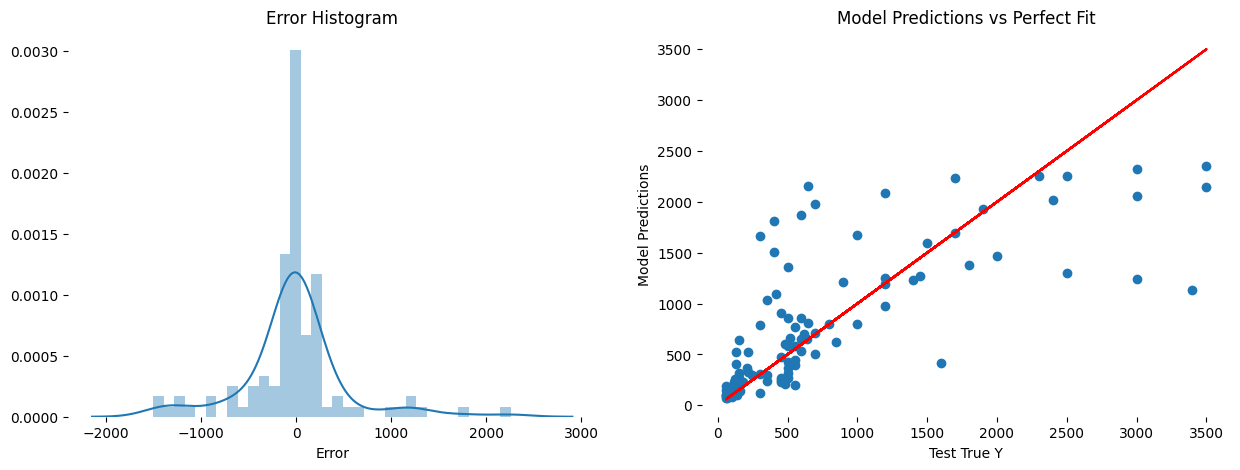

In [268]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,RFRModel_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - RFRModel_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [269]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', Dtree_model.predict(single_house))

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: [400.]

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [270]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}

rfr_model = RandomForestRegressor(random_state=35)

# Create  object
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(train_X, train_Y)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 7, 'n_estimators': 200}


In [271]:
print('model_name', RFRModel.__class__.__name__)

RFRModel_score = RFRModel.score(test_X, test_Y)
print('prediction_score', RFRModel_score)

mae = mean_absolute_error(RFRModel_predicted, test_Y)
print('mean_absolute_error', mae)

mse = mean_squared_error(RFRModel_predicted, test_Y)
print("Mean Squared Error:", mse)
 

model_name RandomForestRegressor
prediction_score 0.5750054210452442
mean_absolute_error 319.51023517167994
Mean Squared Error: 299862.91204810096


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\659093756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

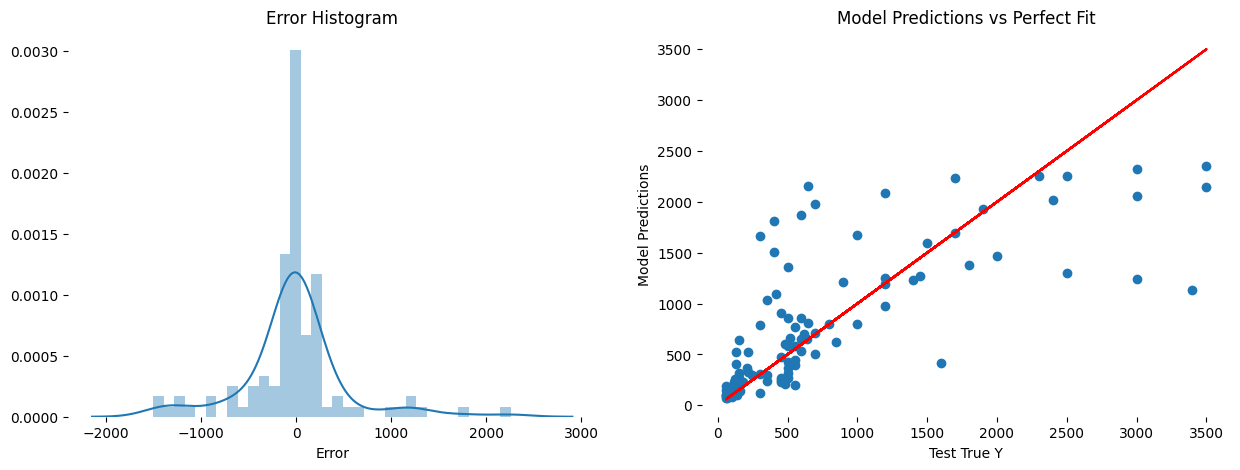

In [272]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,RFRModel_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - RFRModel_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [273]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', RFRModel.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 976.8564682539682

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [274]:
# Creating Model
BGR_model = BaggingRegressor()

# Model Fitting
BGR_model.fit(train_X, train_Y)

# Model Prediction
BGR_model_predicted = BGR_model.predict(test_X)

# Model Score
BGR_model_score = BGR_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, BGR_model_predicted)

In [275]:
print('model_name', BGR_model.__class__.__name__)

BGR_model_score = BGR_model.score(test_X, test_Y)
print('prediction_score', BGR_model_score)

mae = mean_absolute_error(test_Y, BGR_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(BGR_model_predicted, test_Y)
print("Mean Squared Error:", mse)

model_name BaggingRegressor
prediction_score 0.5818672690281013
mean_absolute_error 308.3703703703704
Mean Squared Error: 295021.40625


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\2508442782.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

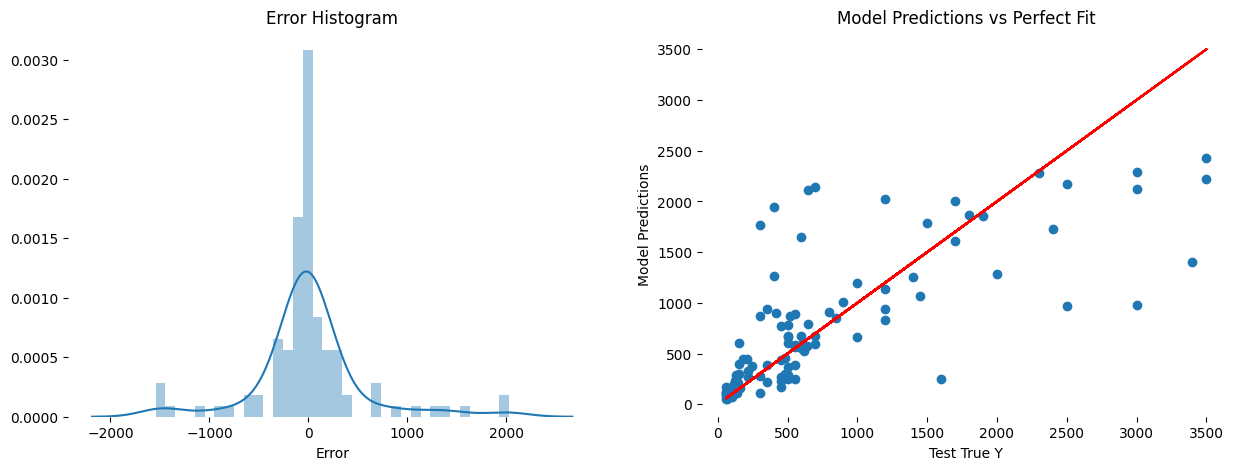

In [276]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,BGR_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - BGR_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [277]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', BGR_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 1043.0

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Ada Boost Regressor Model

In [278]:
# Creating Model
ADB_model = AdaBoostRegressor()

# Model Fitting
ADB_model.fit(train_X, train_Y)

# Model Prediction
ADB_model_predicted = ADB_model.predict(test_X)

# Model Score
ADB_model_score = ADB_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, ADB_model_predicted)

In [279]:
print('model_name', ADB_model.__class__.__name__)

ADB_model_score = ADB_model.score(test_X, test_Y)
print('prediction_score', ADB_model_score)

mae = mean_absolute_error(test_Y, ADB_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(test_Y, ADB_model_predicted)
print("Mean Squared Error:", mse)

model_name AdaBoostRegressor
prediction_score 0.5499516201244956
mean_absolute_error 432.67331830914014
Mean Squared Error: 317540.0921204821


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\2304325590.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

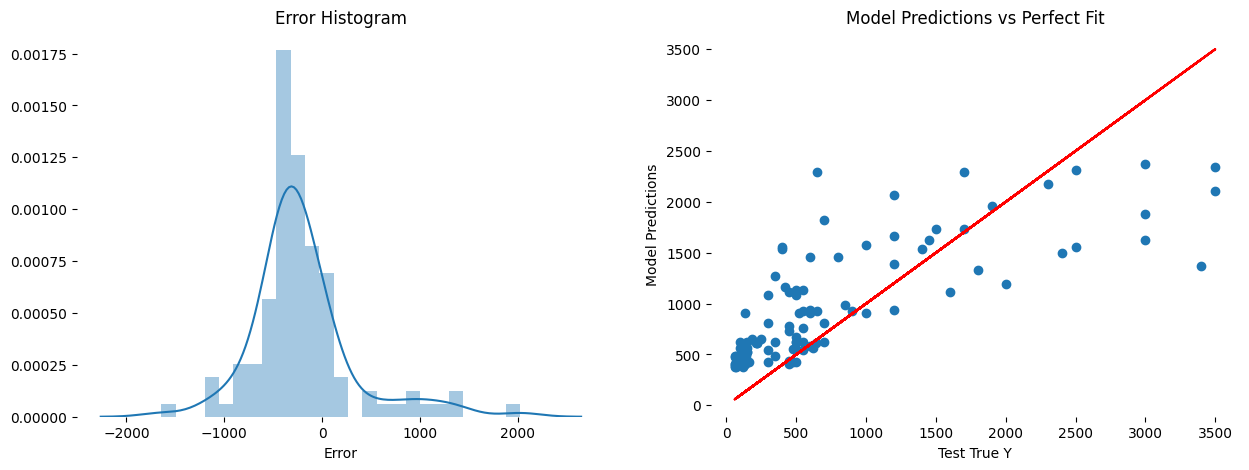

In [280]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,ADB_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - ADB_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [281]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', ADB_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 782.3863636363636

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Gradient Boosting Regressor Model

In [282]:
GBR_model = GradientBoostingRegressor(n_estimators=150, random_state=1)
GBR_model.fit(train_X, train_Y)
GBR_model_predicted = GBR_model.predict(test_X)
GBR_model_score = GBR_model.score(test_X, test_Y)

In [283]:
print('model_name', GBR_model.__class__.__name__)

GBR_model_score = GBR_model.score(test_X, test_Y)
print('prediction_score', GBR_model_score)

mae = mean_absolute_error(test_Y, GBR_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(test_Y, GBR_model_predicted)
print("Mean Squared Error:", mse)

model_name GradientBoostingRegressor
prediction_score 0.6142156436327373
mean_absolute_error 326.81508460087014
Mean Squared Error: 272197.4026289993


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\1575749582.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

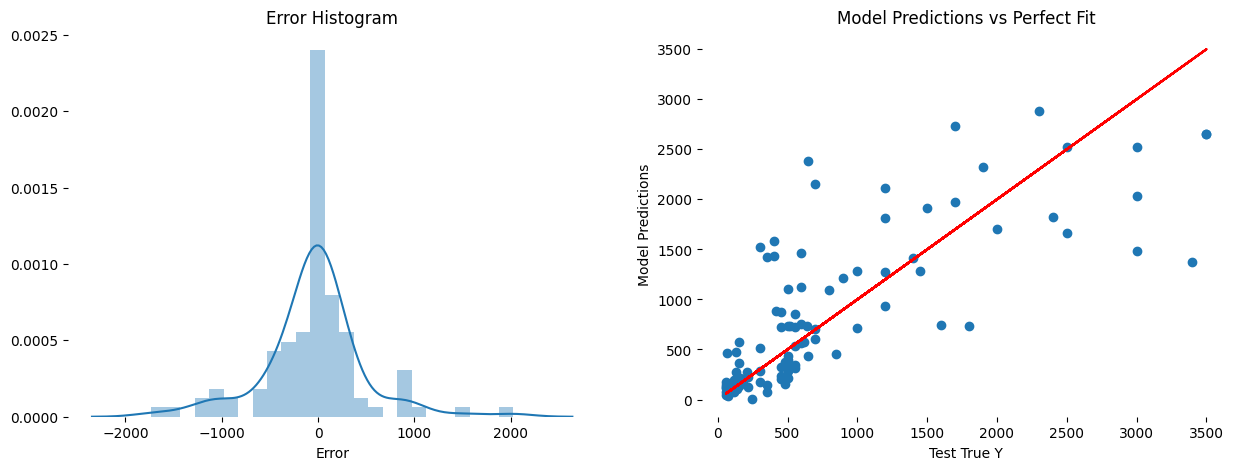

In [284]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,GBR_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - GBR_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [285]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', GBR_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 815.5667553048652

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [286]:
# Random Forest Regressor Model
from xgboost import XGBRegressor
XGBR_model = XGBRegressor()
XGBR_model.fit(train_X, train_Y)
XGBR_model_predicted = XGBR_model.predict(test_X)

In [287]:
print('model_name', XGBR_model.__class__.__name__)

XGBR_model_score = XGBR_model.score(test_X, test_Y)
print('prediction_score', XGBR_model_score)

mae = mean_absolute_error(test_Y, XGBR_model_predicted)
print('mean_absolute_error', mae)

mse = mean_squared_error(test_Y, XGBR_model_predicted)
print("Mean Squared Error:", mse)
 

model_name XGBRegressor
prediction_score 0.6026214915104136
mean_absolute_error 302.0418156164664
Mean Squared Error: 280377.874546263


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\1552000320.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

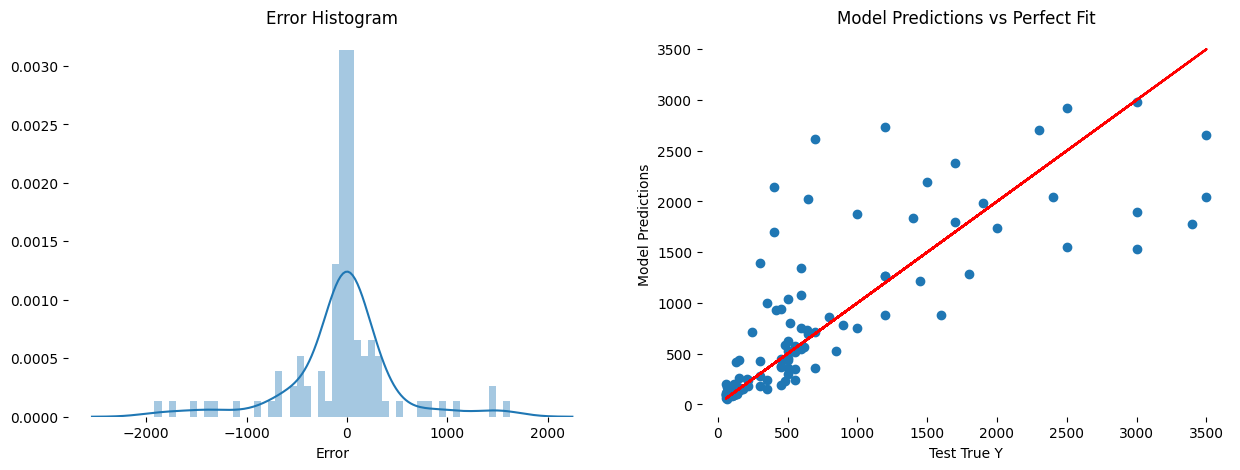

In [288]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,XGBR_model_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - XGBR_model_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [289]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', XGBR_model.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 1085.7719

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Let's implement some hyper param tunning using `n_estimators=500, max_depth=10, learning_rate=0.05`.

In [290]:
XGBR_model_500 = XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
XGBR_model_500.fit(train_X, train_Y)
XGBR_model_500_predicted = XGBR_model_500.predict(test_X)

In [291]:
print('model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)')

XGBR_model_500_score = XGBR_model_500.score(test_X, test_Y)
print('prediction_score', XGBR_model_500_score)

mae = mean_absolute_error(test_Y, XGBR_model_500_predicted)
print(mae)

mse = mean_squared_error(test_Y, XGBR_model_500_predicted)
print("Mean Squared Error:", mse)

model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
prediction_score 0.482253499864677
340.90384285538283
Mean Squared Error: 365305.7731115633


In [292]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', XGBR_model_500.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 1038.2063

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\132933476.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

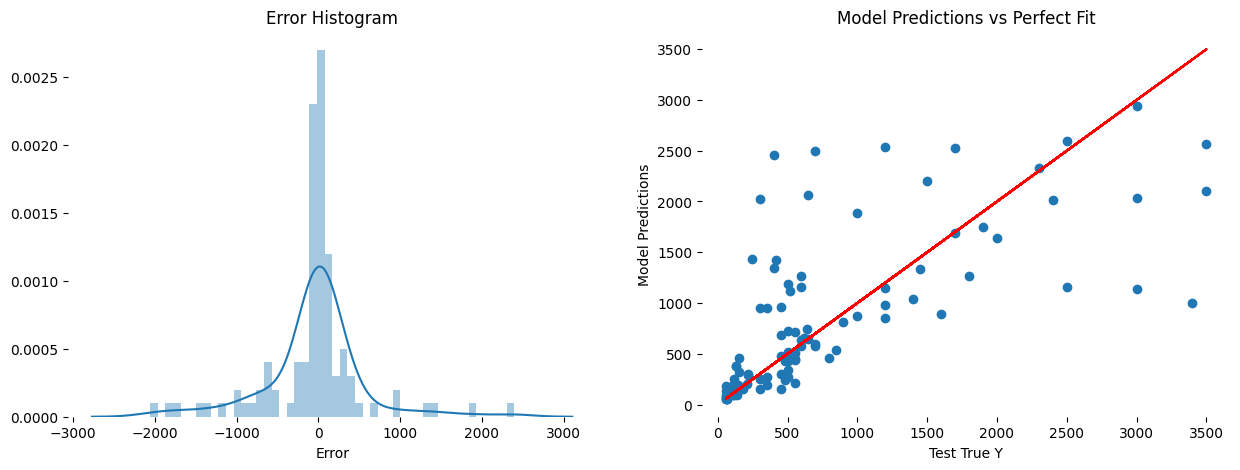

In [293]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,XGBR_model_500_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - XGBR_model_500_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

C:\Users\T8\AppData\Local\Temp\ipykernel_9924\132933476.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

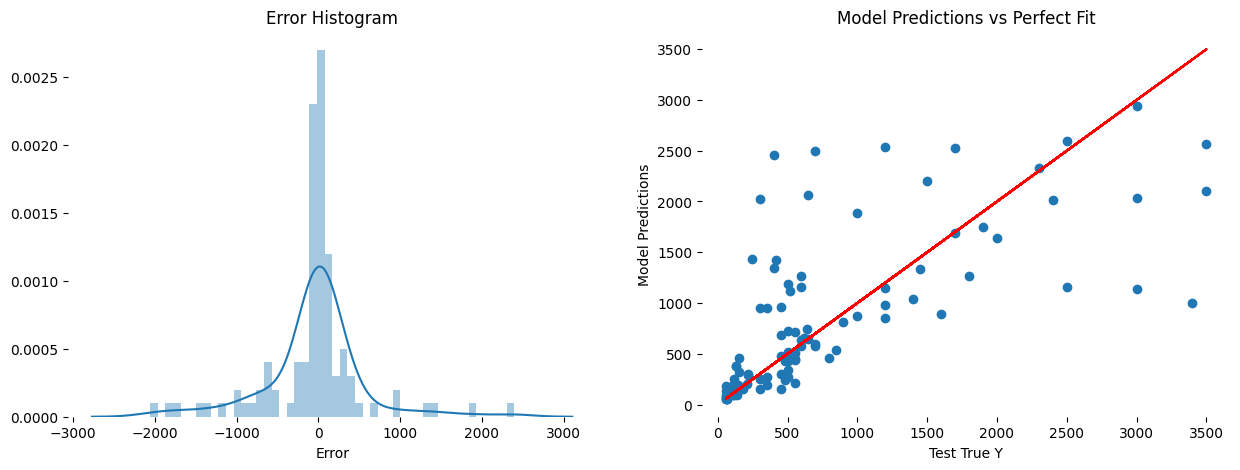

In [294]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,XGBR_model_500_predicted)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - XGBR_model_500_predicted
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [295]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', XGBR_model_500.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 1038.2063

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# HYPER PARAMS TUNNING 

- Using GridSearchCV.


In [296]:
xgbr_model = XGBRegressor() # {'objective': 'reg:squarederror' }
params = {
    'n_estimators': [110, 120, 130, 140], 
    'learning_rate': [ 0.05, 0.075, 0.1],
    'max_depth': [ 7, 9],
    'reg_lambda': [0.3, 0.5]
}

xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)
xgb_reg.fit(train_X, train_Y)

xgbr_model_score = xgb_reg.best_score_
xgbr_model_pred = xgb_reg.predict(test_X)

mae = mean_absolute_error(test_Y, xgbr_model_pred)

In [297]:
xgbr_model_score = xgb_reg.best_score_
print("Best score: %0.3f" % xgb_reg.best_score_)

mae = mean_absolute_error(test_Y, xgbr_model_pred)
print("mean_absolute_error :", mae)

mse = mean_squared_error(test_Y, xgbr_model_pred)
print("Mean Squared Error:", mse)

print("Best parameters set:", xgb_reg.best_params_)

Best score: 0.691
mean_absolute_error : 323.81670623355444
Mean Squared Error: 318275.50691567385
Best parameters set: {'learning_rate': 0.075, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.5}


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\176945428.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

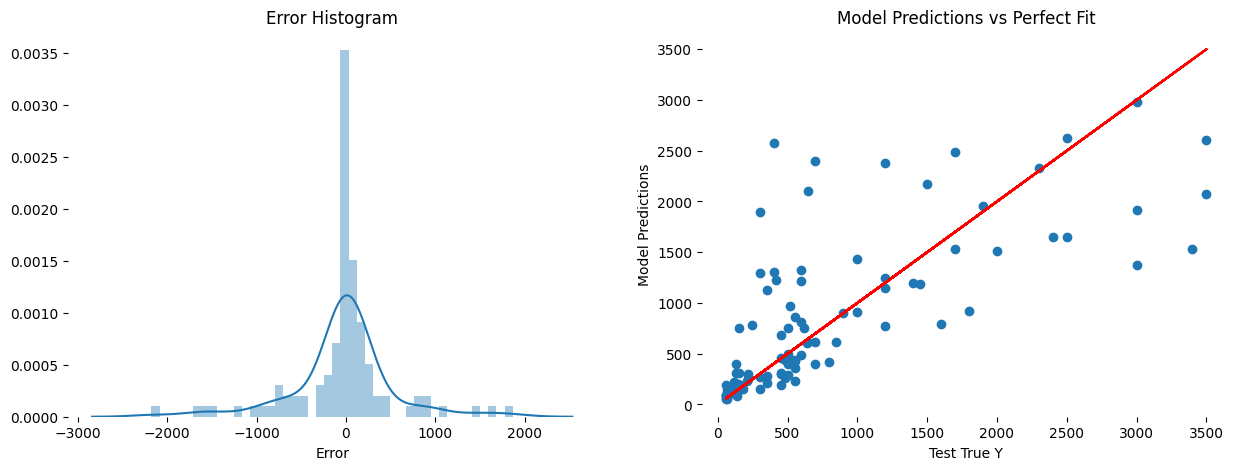

In [298]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,xgbr_model_pred)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - xgbr_model_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [299]:
# features of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', xgb_reg.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64

Prediction Price: 892.8391

Original Price: 3000


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [300]:
rfr_model = RandomForestRegressor(random_state=35)

rfr_params_grid = {
    'n_estimators' : [600,750,800,850],
    'max_depth' : [7],
    'max_features': [5],
    'min_samples_leaf' : [3],
    'min_samples_split' : [4, 6 ,9]
}

gscv_rfr_cv = GridSearchCV(estimator=rfr_model, 
                                      param_grid=rfr_params_grid,
                                      cv = 5 ,
                                      n_jobs = -1,
                                      verbose = 5)

gscv_rfr_cv.fit(train_X, train_Y)

gscv_rfr_cv_score = gscv_rfr_cv.best_score_

gscv_rfr_cv_pred = gscv_rfr_cv.predict(test_X)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [301]:
print('model_name Random Forest Regressor Hyper Params Tunning')

gscv_rfr_cv_score = gscv_rfr_cv.best_score_
print("Best score: %0.3f" % gscv_rfr_cv.best_score_)

mae = mean_absolute_error(test_Y, gscv_rfr_cv_pred)
print("mean_absolute_error :", mae)

print("Best parameters set:", gscv_rfr_cv.best_params_)

mse = mean_squared_error(test_Y, gscv_rfr_cv_pred)
print("Mean Squared Error:", mse)

model_name Random Forest Regressor Hyper Params Tunning
Best score: 0.751
mean_absolute_error : 313.8029003260454
Best parameters set: {'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 750}
Mean Squared Error: 265507.7301209631


C:\Users\T8\AppData\Local\Temp\ipykernel_9924\2290786380.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

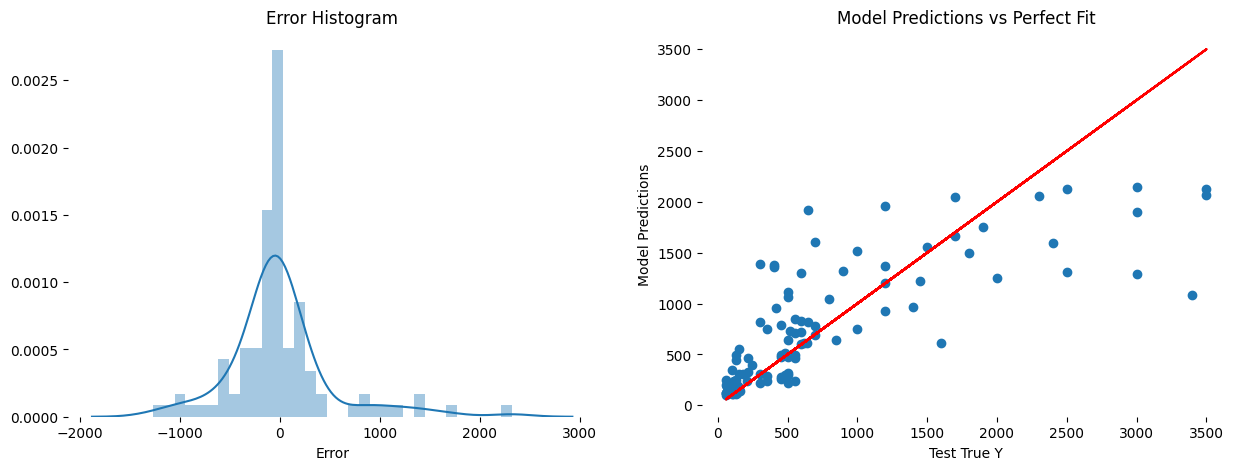

In [302]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(test_Y,gscv_rfr_cv_pred)

# Perfect predictions
plt.plot(test_Y,test_Y,'r')

errors = test_Y.values.reshape(1, 108) - gscv_rfr_cv_pred
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [303]:
# fueatures of new house
single_house = data.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = minMaxNorm.transform(single_house.values.reshape(-1, 20))

# run the model and get the price prediction
print('\nPrediction Price:', gscv_rfr_cv.predict(single_house)[0])

# original price
print('\nOriginal Price:',data.iloc[0]['price'])

Features of new house:
suburb          65
density          2
property         2
rooms           15
bedroom          7
toilets          8
ensuite          7
condition        4
constituency    12
council          2
carport          2
pool             0
furnished        1
cottage          0
power            1
pbackup          1
water            1
wbackup          1
gated            0
garden           1
Name: 0, dtype: int64


c:\Users\T8\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Prediction Price: 748.248851367024

Original Price: 3000
